In [ ]:
import numpy as np
import pandas as pd
import statistics as stat
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
numeric_columns = ['age','trestbps','chol','thalch','oldpeak', 'id', 'ca']
mean = df[numeric_columns].mean()
df[numeric_columns]=df[numeric_columns].fillna(mean)


In [ ]:
categ_columns = ['slope','thal','restecg','dataset','cp','fbs', 'exang']
categ_mode = df[categ_columns].mode().iloc[0]
df[categ_columns] = df[categ_columns].fillna(categ_mode)

In [ ]:
#normalization using min-max feature scaling
df_scaled = df[numeric_columns].copy()
for i in df_scaled:
  df_scaled[i]= (df_scaled[i]-df_scaled[i].min())/(df_scaled[i].max() - df_scaled[i].min())
df[numeric_columns] = df_scaled

In [ ]:
categ_columns =  ['slope','thal','restecg','dataset','cp', 'sex']
df[categ_columns]


,slope,thal,restecg,dataset,cp,sex
0,downsloping,fixed defect,lv hypertrophy,Cleveland,typical angina,Male
1,flat,normal,lv hypertrophy,Cleveland,asymptomatic,Male
2,flat,reversable defect,lv hypertrophy,Cleveland,asymptomatic,Male
3,downsloping,normal,normal,Cleveland,non-anginal,Male
4,upsloping,normal,lv hypertrophy,Cleveland,atypical angina,Female
...,...,...,...,...,...,...
915,flat,normal,st-t abnormality,VA Long Beach,asymptomatic,Female
916,flat,normal,st-t abnormality,VA Long Beach,typical angina,Male
917,flat,fixed defect,st-t abnormality,VA Long Beach,asymptomatic,Male
918,flat,normal,lv hypertrophy,VA Long Beach,asymptomatic,Male


In [ ]:
binary_fatures = ['fbs','exang','sex']
nominal_features = ['thal','restecg','dataset','cp']

In [ ]:
df


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.000000,0.714286,Male,Cleveland,typical angina,0.725000,0.386401,True,lv hypertrophy,0.633803,False,0.556818,downsloping,0.000000,fixed defect,0
1,0.001088,0.795918,Male,Cleveland,asymptomatic,0.800000,0.474295,False,lv hypertrophy,0.338028,True,0.465909,flat,1.000000,normal,2
2,0.002176,0.795918,Male,Cleveland,asymptomatic,0.600000,0.379768,False,lv hypertrophy,0.485915,True,0.590909,flat,0.666667,reversable defect,1
3,0.003264,0.183673,Male,Cleveland,non-anginal,0.650000,0.414594,False,normal,0.894366,False,0.693182,downsloping,0.000000,normal,0
4,0.004353,0.265306,Female,Cleveland,atypical angina,0.650000,0.338308,False,lv hypertrophy,0.788732,False,0.454545,upsloping,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.995647,0.530612,Female,VA Long Beach,asymptomatic,0.635000,0.552239,True,st-t abnormality,0.661972,False,0.295455,flat,0.225458,normal,1
916,0.996736,0.693878,Male,VA Long Beach,typical angina,0.660662,0.230514,False,st-t abnormality,0.546096,False,0.395317,flat,0.225458,normal,0
917,0.997824,0.551020,Male,VA Long Beach,asymptomatic,0.610000,0.369818,True,st-t abnormality,0.281690,False,0.295455,flat,0.225458,fixed defect,2
918,0.998912,0.612245,Male,VA Long Beach,asymptomatic,0.660662,0.638474,True,lv hypertrophy,0.546096,False,0.395317,flat,0.225458,normal,0


In [ ]:


#df = pd.get_dummies(df, columns=nominal_features ,drop_first=1)
#df = pd.get_dummies(df, columns=binary_features ,drop_first=1)

from sklearn.preprocessing import LabelEncoder
ordinal_features = ['slope']
le = LabelEncoder()
df_ord = le.fit_transform(df[ordinal_features])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df_ord = pd.DataFrame(df_ord)
df[ordinal_features] = df_ord
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.000000,0.714286,Male,Cleveland,typical angina,0.725000,0.386401,True,lv hypertrophy,0.633803,False,0.556818,0,0.000000,fixed defect,0
1,0.001088,0.795918,Male,Cleveland,asymptomatic,0.800000,0.474295,False,lv hypertrophy,0.338028,True,0.465909,1,1.000000,normal,2
2,0.002176,0.795918,Male,Cleveland,asymptomatic,0.600000,0.379768,False,lv hypertrophy,0.485915,True,0.590909,1,0.666667,reversable defect,1
3,0.003264,0.183673,Male,Cleveland,non-anginal,0.650000,0.414594,False,normal,0.894366,False,0.693182,0,0.000000,normal,0
4,0.004353,0.265306,Female,Cleveland,atypical angina,0.650000,0.338308,False,lv hypertrophy,0.788732,False,0.454545,2,0.000000,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.995647,0.530612,Female,VA Long Beach,asymptomatic,0.635000,0.552239,True,st-t abnormality,0.661972,False,0.295455,1,0.225458,normal,1
916,0.996736,0.693878,Male,VA Long Beach,typical angina,0.660662,0.230514,False,st-t abnormality,0.546096,False,0.395317,1,0.225458,normal,0
917,0.997824,0.551020,Male,VA Long Beach,asymptomatic,0.610000,0.369818,True,st-t abnormality,0.281690,False,0.295455,1,0.225458,fixed defect,2
918,0.998912,0.612245,Male,VA Long Beach,asymptomatic,0.660662,0.638474,True,lv hypertrophy,0.546096,False,0.395317,1,0.225458,normal,0


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,slope,ca,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.500000,0.520630,0.660662,0.330233,0.546096,0.395317,1.152174,0.225458,0.995652
std,0.289146,0.192341,0.092219,0.180693,0.177032,0.119747,0.516007,0.180556,1.142693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.387755,0.600000,0.294776,0.422535,0.295455,1.000000,0.225458,0.000000
50%,0.500000,0.530612,0.650000,0.366501,0.549296,0.386364,1.000000,0.225458,1.000000
75%,0.750000,0.653061,0.700000,0.442786,0.676056,0.465909,1.000000,0.225458,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(7), int64(2), object(5)
memory usage: 102.5+ KB


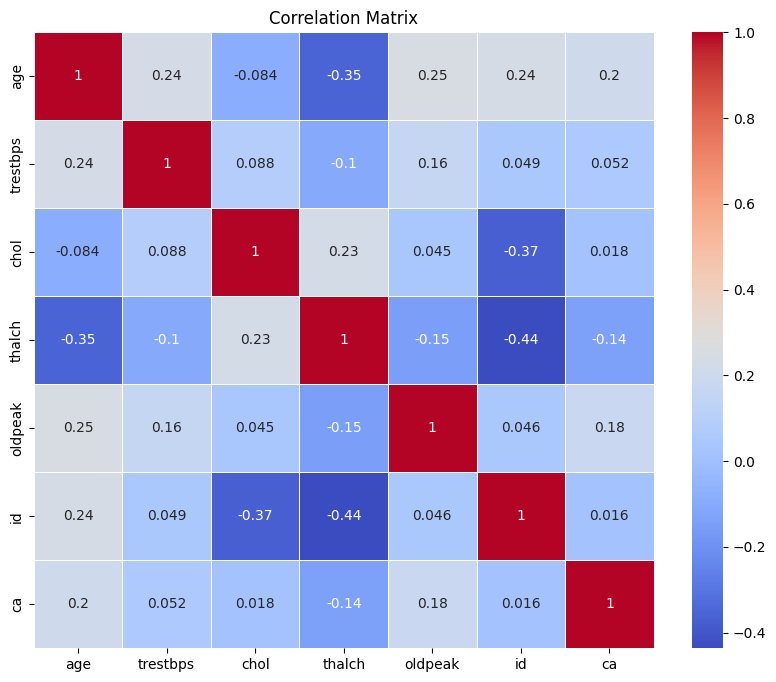

In [ ]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


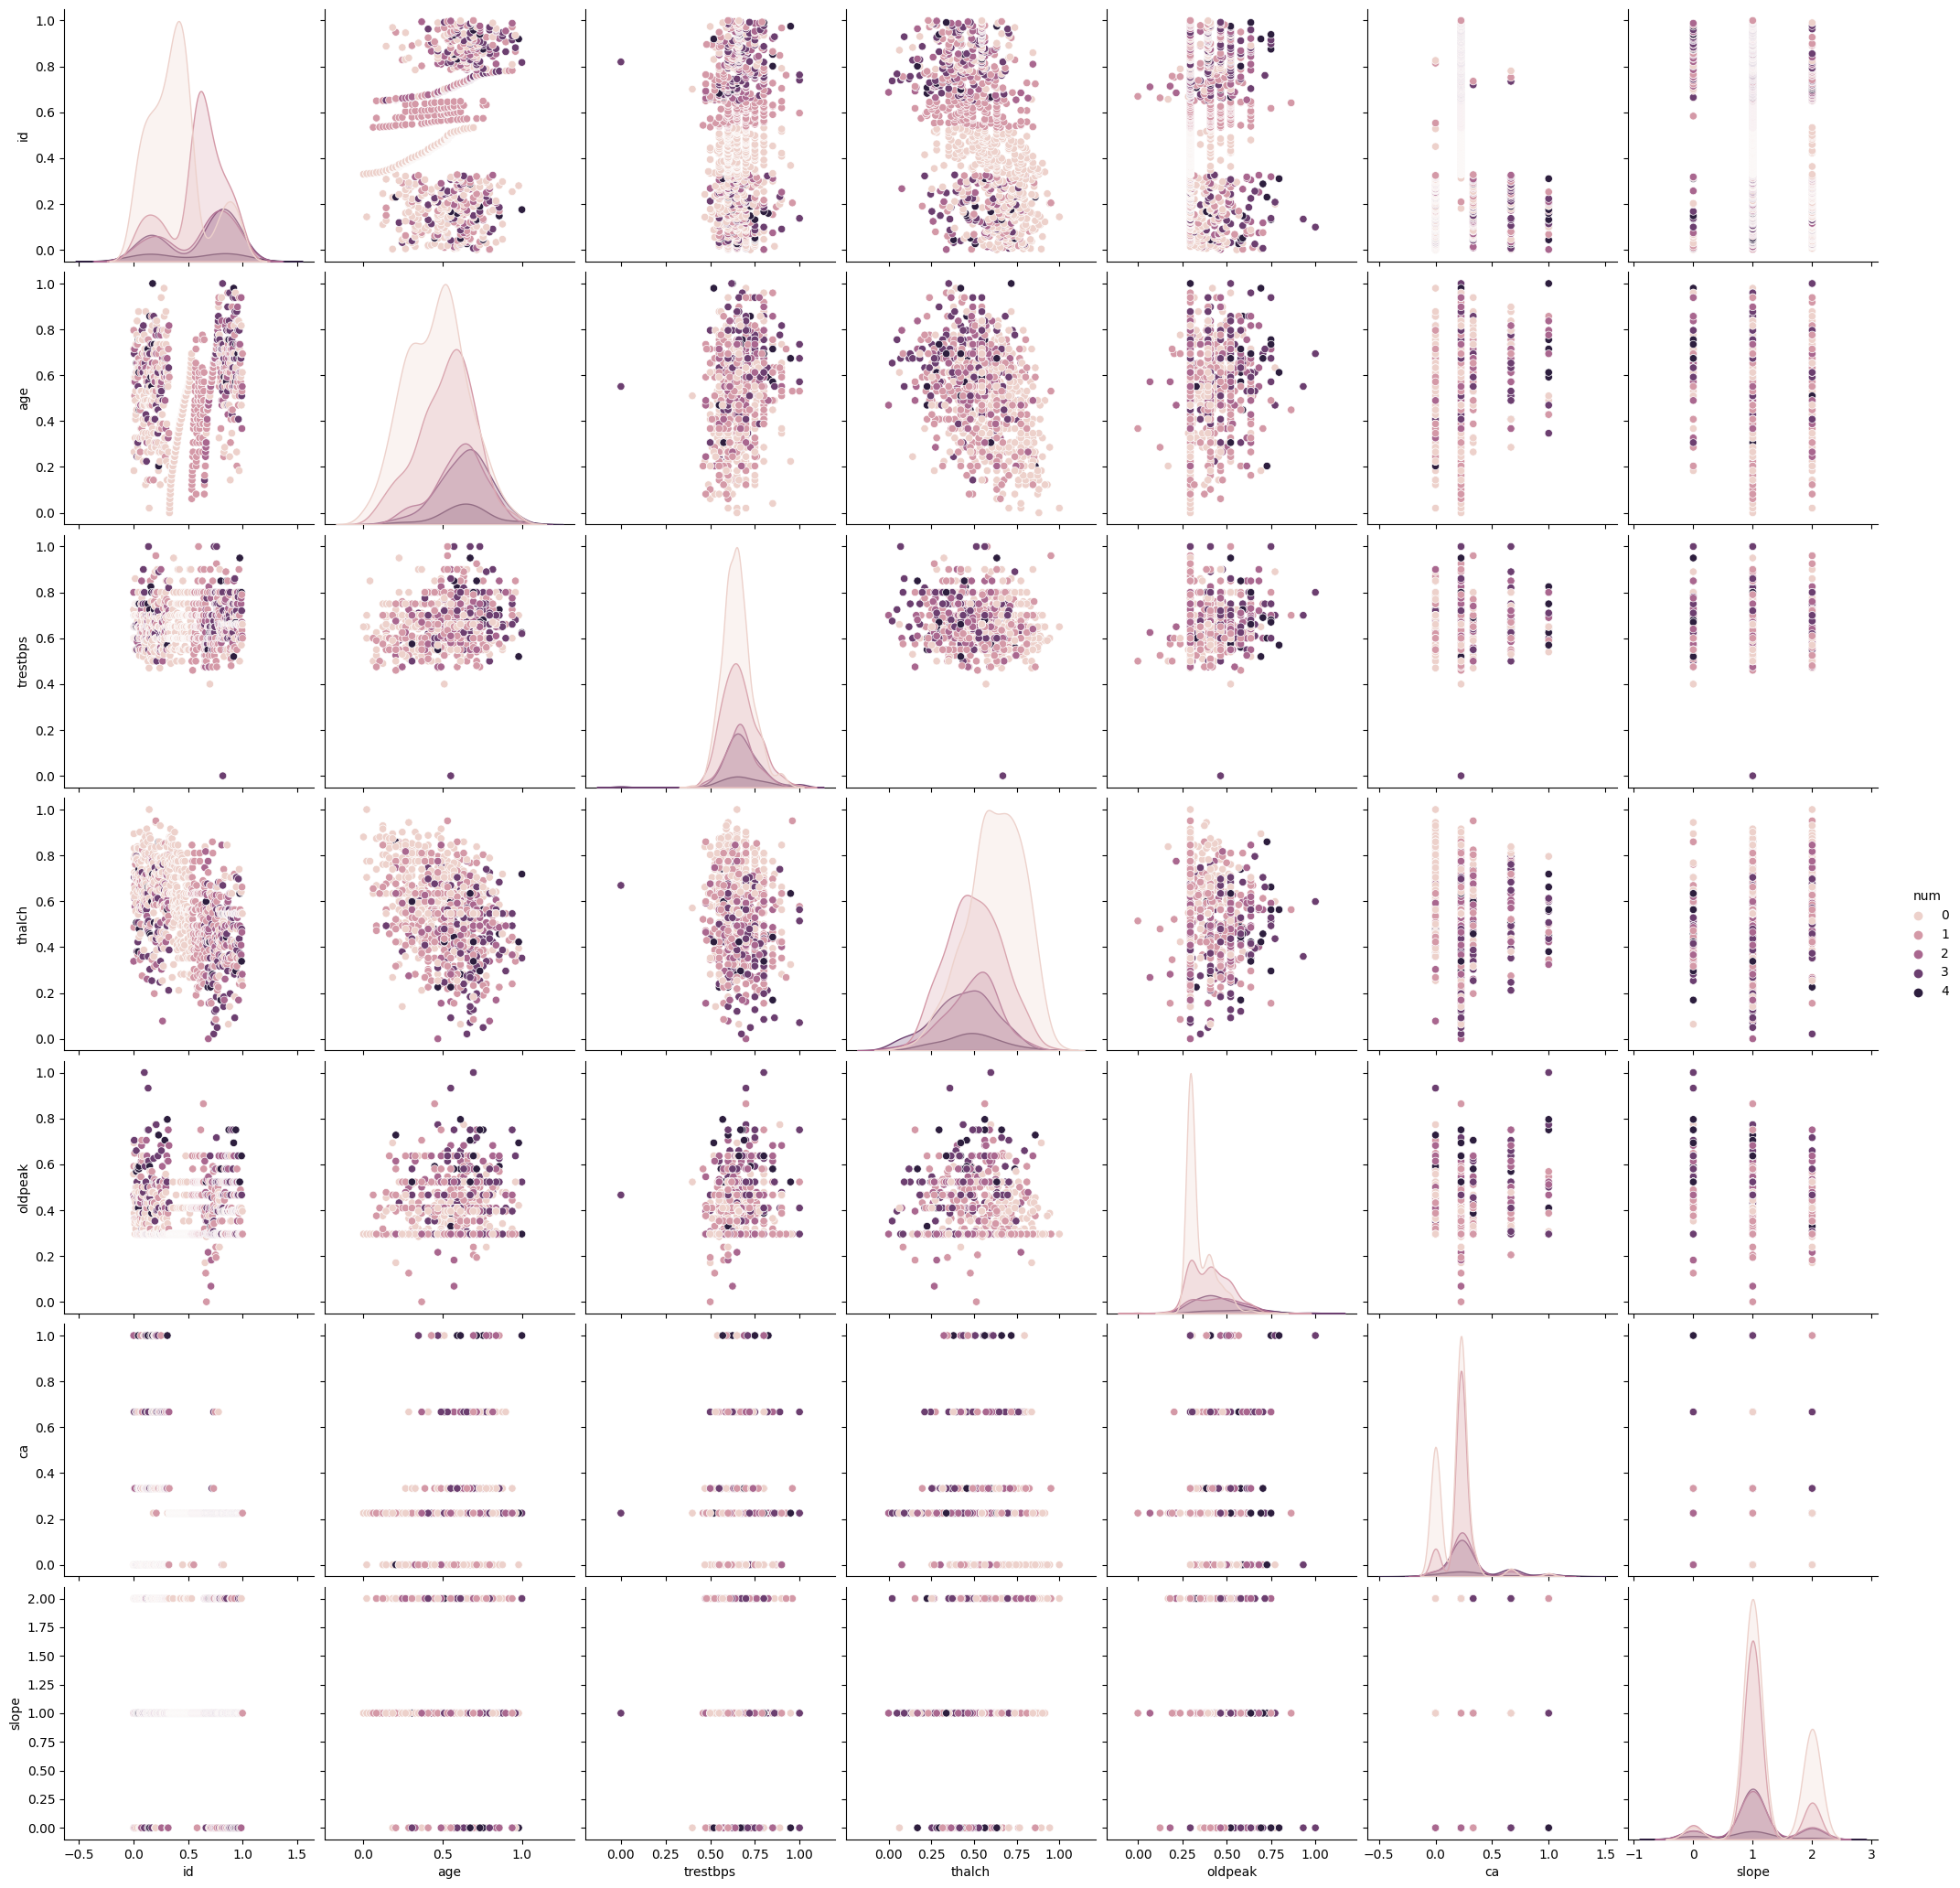

In [ ]:
newdf = df[['id','age','trestbps','thalch','oldpeak','ca','slope','num']]
sns.pairplot(newdf, hue ="num", size=3)
plt.show()

In [ ]:
req_columns = ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca','slope']
dfg = [ 'thal_normal','thal_reversable defect','restecg_normal','restecg_st-t abnormality','dataset_Hungary','dataset_Switzerland','dataset_VA Long Beach','cp_atypical angina','cp_non-anginal','cp_typical angina','sex_Male','fbs_True','exang_True']
x = df[req_columns]
y = df['num']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [ ]:
#x_train = x_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop = True)


In [ ]:
#knn algorithm
class KNN:
  def __init__(self):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    import array
  def num(self, t):
    if(type(t) == pd.core.frame.DataFrame):
      t = t.to_numpy()
    return t
  def enc(self,y):
    # where x and y are features and categories respectively
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    #y = y.fillna(0)
    return y_enc
  #def predict
  def fit(self,x,y,x_pred,k):
     pred_length = len(x_pred)
     length = len(y)
     x = self.num(x)
     y = self.num(y)
     x_pred = self.num(x_pred)
     #x_pred = x_pred.to_numpy()
     y = self.enc(y)


     dis =np.zeros([length,2])
     y_pred_arr = []
     #print(length,pred_length)
     for i in range(pred_length):
        point_1 = x_pred[i]

        for j in range(length):

          point_2 = x[j]
          euc = np.linalg.norm(point_1 - point_2)
          #if(i<10 & j<10):
           #  print(euc,i,j)
          dis[j] = [euc, j]
        #ind = np.argsort(dis[:,0])
        #dq = dis[ind]
        ind = np.argsort(dis[:,0])
        dis = dis[ind]
        div =np.zeros([k,1])
        y_lis = np.zeros([k,1])
        for j in range(k):
          div[j]=dis[j,1]
        div = div.astype(int)
        for j in range(k):
          y_lis[j] = y[div[j]]
        y_lis = y_lis.astype(int)
        #y_pred = le.inverse_transform(y_lis)
        y_pred = pd.DataFrame(y_lis)
        y_pred_mode = y_pred.mode().iloc[0]
        y_pred_arr.append(y_pred_mode)
     return y_pred_arr
  def accur(self,y_pred,y_act):
    length = len(y_pred)
    count = 0
    y_act= near.num(y_act)
    y_act = self.enc(y_act)
    for i in range(length):
      if(y_pred[i][0] == y_act[i] ):
        count= count+1
    accuracy = (count/length)*100
    return accuracy

In [ ]:
class KNN:
  def __init__(self):
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    import array
  def enc(self,y):
    # where x and y are features and categories respectively
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    #y = y.fillna(0)
    return y_enc
  #def predict
  def fit(self,x,y,x_pred,k):
     #x_pred = x_pred.to_numpy()
    # x = x.to_numpy()
     #x = x.to_numpy()
     #y = y.to_numpy()
     #x_pred = x_pred.to_numpy()
     y = self.enc(y)
     length = len(y)
     pred_length = len(x_pred)
     dis =np.zeros([length,2])
     y_pred_arr = []
     #print(length,pred_length)
     for i in range(pred_length):
        point_1 = x_pred[i]

        for j in range(length):

          point_2 = x[j]
          euc = np.linalg.norm(point_1 - point_2)
          #if(i<10 & j<10):
           #  print(euc,i,j)
          dis[j] = [euc, j]
        #ind = np.argsort(dis[:,0])
        #dq = dis[ind]
        ind = np.argsort(dis[:,0])
        dis = dis[ind]
        div =np.zeros([k,1])
        y_lis = np.zeros([k,1])
        for j in range(k):
          div[j]=dis[j,1]
        div = div.astype(int)
        for j in range(k):
          y_lis[j] = y[div[j]]
        y_lis = y_lis.astype(int)
        #y_pred = le.inverse_transform(y_lis)
        y_pred = pd.DataFrame(y_lis)
        y_pred_mode = y_pred.mode().iloc[0]
        y_pred_arr.append(y_pred_mode)
     return y_pred_arr
  def accur(self,y_pred,y_act):
    length = len(y_pred)
    count = 0
    #y_act= y_act.to_numpy()
    y_act = self.enc(y_act)
    for i in range(length):
      if(y_pred[i][0] == y_act[i] ):
        count= count+1
    accuracy = (count/length)*100
    return accuracy





In [ ]:
a = KNN()
y_predicted = a.fit(x_train,y_train,x_test,3)

TypeError: ignored

In [ ]:
arr = np.zeros(100)
near = KNN()
for val in range(1,100):
  y_predic = near.fit(x_train,y_train,x_test,val)
  acc = near.accur(y_predic, y_test)
  arr[val] = acc


In [ ]:
arr

In [ ]:
arr.shift()
x = np.arange(1,100,1)
x
plt.plot(x,arr)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

arr_3= np.zeros(100)
for val in range(1,100):
  neigh = KNeighborsClassifier(n_neighbors=val)
  neigh.fit(x_train,y_train)
  y_predic =  neigh.predict(x_test)
  score = neigh.score(x_test,y_test)
  arr_3[val] = score*100

In [ ]:
arr_3

In [ ]:
#cross valdiation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold


In [ ]:
x_train

In [ ]:
#stratified K-fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
a = KNN()
for i,j in skf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[i], x_train[j]
    y_train_fold, y_val_fold  = y_train[i],y_train[j]

    y_pred_fold = a.fit(x_train_fold, y_train_fold, x_val_fold,5)

    score = a.accur(y_pred_fold, y_val_fold)
    scores.append(score)



In [ ]:
scores

In [ ]:
#bootstrapping
def bootstrap_cross_val(k,num_boot, k_values,x, y):
  avg_accur = []

  for k in k_values:
    scores = []

    for _ in range(num_boot):
      skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
      indices = np.random.choice(len(x), size=len(x), replace=True)
      a = KNN()


      for i,j in skf.split(x[indices], y[indices]):
        x_train_fold, x_val_fold = x[i], x[j]
        y_train_fold, y_val_fold  = y[i],y[j]

        y_pred_fold = a.fit(x_train_fold, y_train_fold, x_val_fold,k)

        score = a.accur(y_pred_fold, y_val_fold)
        scores.append(score)

      avg = sum(scores) / len(scores)
      avg_accur.append(avg)
  return avg_accur

In [ ]:
k_va = [1,2,3,4,5]

In [ ]:
poi = bootstrap_cross_val(5,1,[1,2,3,4,5],x_train,y_train)
8

NameError: ignored

In [ ]:
poi

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/heart_disease_uci.csv')
numeric_columns = ['age','trestbps','chol','thalch','oldpeak', 'id', 'ca']
mean = df[numeric_columns].mean()
df[numeric_columns]=df[numeric_columns].fillna(mean)
categ_columns = ['slope','thal','restecg','dataset','cp','fbs', 'exang']
categ_mode = df[categ_columns].mode().iloc[0]
df[categ_columns] = df[categ_columns].fillna(categ_mode)
#normalization using min-max feature scaling
df_scaled = df[numeric_columns].copy()
for i in df_scaled:
  df_scaled[i]= (df_scaled[i]-df_scaled[i].min())/(df_scaled[i].max() - df_scaled[i].min())
df[numeric_columns] = df_scaled
categ_columns =  ['slope','thal','restecg','dataset','cp', 'sex']

binary_fatures = ['fbs','exang','sex']
nominal_features = ['thal','restecg','dataset','cp']
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['slope']
le = LabelEncoder()
df_ord = le.fit_transform(df[ordinal_features])
df_ord = pd.DataFrame(df_ord)
df[ordinal_features] = df_ord

req_columns = ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca','slope']
dfg = [ 'thal_normal','thal_reversable defect','restecg_normal','restecg_st-t abnormality','dataset_Hungary','dataset_Switzerland','dataset_VA Long Beach','cp_atypical angina','cp_non-anginal','cp_typical angina','sex_Male','fbs_True','exang_True']
x = df[req_columns]
y = df['num']
